<a href="https://colab.research.google.com/github/amrios80/parcial/blob/main/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL 2 - CIENCIA DE DATOS - ADRIANA MARIA RIOS SOLANO

In [4]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install joblib

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## 1. Evaluacion Cuantitativa

### Carga de datos

In [88]:
url="https://raw.githubusercontent.com/amrios80/parcial/refs/heads/main/diabetes_data_train.csv"
diabetes_data =pd.read_csv(url)

In [89]:
url="https://raw.githubusercontent.com/amrios80/parcial/refs/heads/main/diabetes_data_test.csv"
diabetes_data_test =pd.read_csv(url)

### Preprocesamiento del modelo

In [90]:
def dummy_encoding(col, dataframe):
    enc_df = pd.get_dummies(dataframe[col], columns=dataframe[col].unique(), drop_first=True, dtype=int, prefix=f"{col}_")
    dataframe = dataframe.join(enc_df)
    return dataframe, enc_df.columns


def diag_cluster(col, dataframe):
    diag_list = []
    for x in dataframe[col]:
        # Si la columna contiene 'V' o 'E' entonces se le asigna el valor 18
        if 'V' in x or 'E' in x:
            diag_list.append(18)
            continue
        # En todos los demás casos, se le asigna el valor indicado según el rango.
        elif 1 <= float(x) <= 139:
            diag_list.append(1)
        elif 140 <= float(x) <= 239:
            diag_list.append(2)
        elif 240 <= float(x) <= 279:
            diag_list.append(3)
        elif 280 <= float(x) <= 289:
            diag_list.append(4)
        elif 290 <= float(x) <= 319:
            diag_list.append(5)
        elif 320 <= float(x) <= 389:
            diag_list.append(6)
        elif 390 <= float(x) <= 459:
            diag_list.append(7)
        elif 460 <= float(x) <= 519:
            diag_list.append(8)
        elif 520 <= float(x) <= 579:
            diag_list.append(9)
        elif 580 <= float(x) <= 629:
            diag_list.append(10)
        elif 630 <= float(x) <= 679:
            diag_list.append(11)
        elif 680 <= float(x) <= 709:
            diag_list.append(12)
        elif 710 <= float(x) <= 739:
            diag_list.append(13)
        elif 740 <= float(x) <= 759:
            diag_list.append(14)
        elif 760 <= float(x) <= 779:
            diag_list.append(15)
        elif 780 <= float(x) <= 799:
            diag_list.append(16)
        elif 800 <= float(x) <= 999:
            diag_list.append(17)
    dataframe[col] = diag_list

In [91]:
diag_cluster('diag_1',diabetes_data)
diag_cluster('diag_2',diabetes_data)
diag_cluster('diag_3',diabetes_data)

diabetes_data, cols_race = dummy_encoding('race', diabetes_data)
diabetes_data, cols_diag_1 = dummy_encoding('diag_1', diabetes_data)
diabetes_data, cols_diag_2 = dummy_encoding('diag_2', diabetes_data)
diabetes_data, cols_diag_3 = dummy_encoding('diag_3', diabetes_data)

extra_cols = list(cols_race)+list(cols_diag_1)+list(cols_diag_2)+list(cols_diag_3)

In [92]:
diabetes_data.sample(3)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,diag_3__8,diag_3__9,diag_3__10,diag_3__11,diag_3__12,diag_3__13,diag_3__14,diag_3__16,diag_3__17,diag_3__18
47331,9424,Caucasian,1,6,3,1,2,3,66,1,...,0,0,0,0,0,0,0,0,0,0
27415,85071,Caucasian,0,9,1,6,7,2,1,0,...,0,0,0,0,0,0,0,0,0,0
40216,75164,Caucasian,0,9,1,3,7,7,30,0,...,0,1,0,0,0,0,0,0,0,0


### Conversion de variables categoricas a numericas mediante Label Encoder.

In [93]:
categorical_columns = diabetes_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != "readmitted":
        diabetes_data[col] = LabelEncoder().fit_transform(diabetes_data[col].astype(str))

In [94]:
diabetes_data.sample(3)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,diag_3__8,diag_3__9,diag_3__10,diag_3__11,diag_3__12,diag_3__13,diag_3__14,diag_3__16,diag_3__17,diag_3__18
50861,38037,0,1,7,3,1,1,5,32,3,...,0,0,0,0,0,0,0,0,0,0
39085,13586,0,1,6,3,18,3,5,44,3,...,1,0,0,0,0,0,0,0,0,0
39801,63179,2,1,8,1,1,7,6,60,2,...,0,0,0,0,0,0,0,0,0,0


### Definicion de las variables de entrada (X) y la variable objetivo (Y) para los datos de entrenamiento.

In [95]:
X_train=diabetes_data[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_train=diabetes_data['readmitted']

###Entrenamiento del modelo

In [96]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=3, random_state = 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=3, random_state=2)

### Preparacion datos de prueba

In [97]:
diabetes_data_test.sample(3)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2106,75919,Caucasian,1,7,1,6,7,1,32,0,...,0,0,0,0,0,0,0,0,1,1
14060,39974,AfricanAmerican,1,7,2,1,7,2,50,0,...,0,1,0,0,0,0,0,1,1,0
3351,68811,Caucasian,1,6,5,1,1,4,30,0,...,0,1,0,0,0,0,0,1,1,1


In [98]:
diag_cluster('diag_1',diabetes_data_test)
diag_cluster('diag_2',diabetes_data_test)
diag_cluster('diag_3',diabetes_data_test)

diabetes_data_test, cols_race = dummy_encoding('race', diabetes_data_test)
diabetes_data_test, cols_diag_1 = dummy_encoding('diag_1', diabetes_data_test)
diabetes_data_test, cols_diag_2 = dummy_encoding('diag_2', diabetes_data_test)
diabetes_data_test, cols_diag_3 = dummy_encoding('diag_3', diabetes_data_test)

extra_cols = list(cols_race)+list(cols_diag_1)+list(cols_diag_2)+list(cols_diag_3)

In [99]:
categorical_columns = diabetes_data_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != "readmitted":
        diabetes_data_test[col] = LabelEncoder().fit_transform(diabetes_data_test[col].astype(str))

In [100]:
X_test=diabetes_data_test[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_test=diabetes_data_test['readmitted']

In [101]:
y_pred = clf.predict(X_test)

###Matriz de confusion

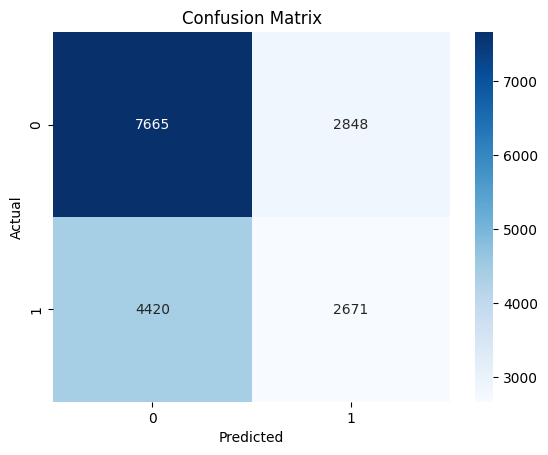

In [102]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

###Metricas del Modelo

In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5871392865257896

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68     10513
           1       0.48      0.38      0.42      7091

    accuracy                           0.59     17604
   macro avg       0.56      0.55      0.55     17604
weighted avg       0.57      0.59      0.58     17604



### Conclusiones: La exactitud del modelo es del 58%, es decir que de 100 pacientes reingresados, el modelo detecta 58, sin embargo una metrica recomendada para este contexto de negocio es el recall ya que permite medir la tasa de verdaderos positivos, es decir la cantidad de pacientes reingresados detectados por el modelo sobre la cantidad total de pacientes reingresados.

## 2. Interpretabilidad

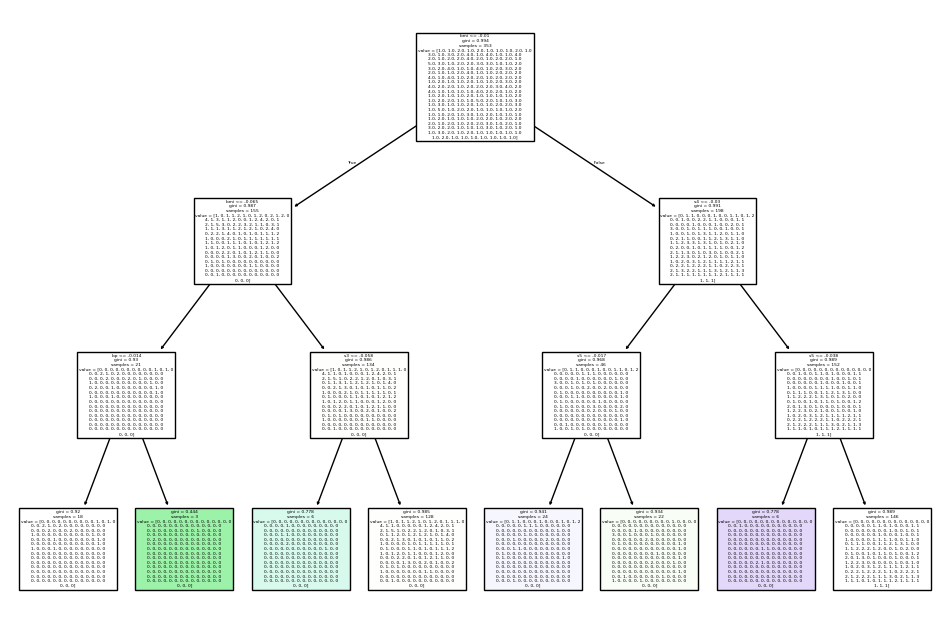

In [106]:
!pip install scikit-learn matplotlib

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

diabetes_data_arbol = load_diabetes()
X = diabetes_data_arbol.data
y = diabetes_data_arbol.target

# Split data into training and testing sets
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a DecisionTreeRegressor
clf_arbol = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_arbol.fit(X_train_a, y_train_a)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_arbol, filled=True, feature_names=diabetes_data_arbol.feature_names)
plt.show()

## 3. Justicia del modelo

In [108]:

# Assuming 'sex' is the intended feature (as 'gender' is not present) and it's the 8th feature (index 7)
# Adjust index if 'sex' is in a different position
grouped = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'gender': X_test[:, 8]})

# Calcular las métricas por grupo (equidad demográfica y predictiva)
equidad_demografica = grouped.groupby('gender')['y_pred'].value_counts(normalize=True)
print(equidad_demografica)

# Verificar las tasas de precisión, recall o F1 por grupo
precision = grouped.groupby('gender').apply(lambda x: classification_report(x['y_test'], x['y_pred'], output_dict=True)['1']['precision'])
recall = grouped.groupby('gender').apply(lambda x: classification_report(x['y_test'], x['y_pred'], output_dict=True)['1']['recall'])

print(f"Precision por grupo:\n{precision}")
print(f"Recall por grupo:\n{recall}")

InvalidIndexError: (slice(None, None, None), 8)

##4.  Mejoramiento continuo y A/B testing

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6220745285162463

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74     10513
           1       0.58      0.23      0.32      7091

    accuracy                           0.62     17604
   macro avg       0.60      0.56      0.53     17604
weighted avg       0.61      0.62      0.57     17604



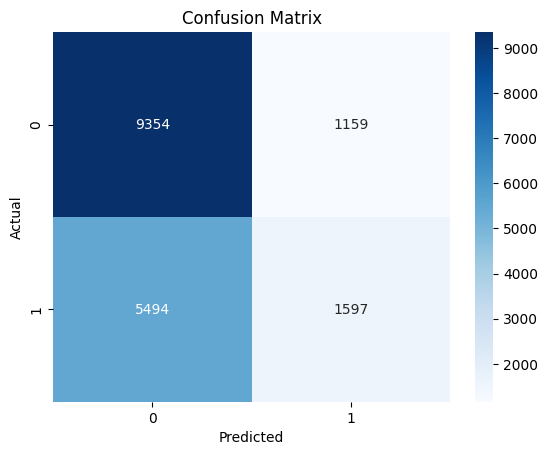

In [104]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()